Adapted from https://colab.research.google.com/drive/1b_cqXwjqH-uk_N7OdtdRv1_5lS9o2oJH
\
Found on https://paperswithcode.com/paper/modeling-framing-in-immigration-discourse-on

In [1]:
# !pip install transformers
# !pip install simpletransformers

In [2]:
from simpletransformers.classification import MultiLabelClassificationModel

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# If running on server with GPUs, can set use_cuda=True
model_generic = MultiLabelClassificationModel(model_type='roberta',model_name="juliamendelsohn/framing_issue_generic",use_cuda=False)
model_specific = MultiLabelClassificationModel(model_type='roberta',model_name="juliamendelsohn/framing_immigration_specific",use_cuda=False)
model_narrative = MultiLabelClassificationModel(model_type='roberta',model_name="juliamendelsohn/framing_narrative",use_cuda=False)

C:\Users\linzh\anaconda3\envs\anlp\Lib\site-packages\huggingface_hub-0.17.3-py3.8.egg\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\linzh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


In [5]:
# All frame labels are in alphabetical order by category. We put these together with predictions to understand results
frames = {}
frames['Issue-Generic'] = ['Capacity and Resources', 'Crime and Punishment','Cultural Identity',
'Economic','External Regulation and Reputation', 'Fairness and Equality','Health and Safety',
'Legality, Constitutionality, Jurisdiction', 'Morality and Ethics','Policy Prescription and Evaluation',
'Political Factors and Implications', 'Public Sentiment','Quality of Life', 'Security and Defense']
frames['Issue-Specific'] = ['Hero: Cultural Diversity','Hero: Integration', 'Hero: Worker',
'Threat: Fiscal', 'Threat: Jobs', 'Threat: National Cohesion','Threat: Public Order',
'Victim: Discrimination','Victim: Global Economy', 'Victim: Humanitarian', 'Victim: War']
frames['Narrative'] = ['Episodic','Thematic']

In [6]:
models = {}
models['Issue-Generic'] = model_generic
models['Issue-Specific'] = model_specific
models['Narrative'] = model_narrative

Replace texts variable with collected data

In [7]:
stacked_news_df = pd.read_csv('scraping/stacked_news_df.csv')
len(stacked_news_df)

3962

In [8]:
stacked_news_df.tail()

,datetime,url,title,owner_username
3957,2023-10-17 15:48:00,/article/idUSKBN31G1YT,Trump pledges to expel immigrants who support ...,Reuters
3958,2023-10-17 15:42:00,/article/idUSKBN31H1ZZ,UN warns Gaza civilians being 'packed in ever-...,Reuters
3959,2023-10-17 15:41:00,/article/idUSKBN31H24T,German chancellor meets families in Israel of ...,Reuters
3960,2023-10-17 15:37:00,/article/idUSC6N3AX041,CORRECTED-Jordan 'strongly condemns' Israeli a...,Reuters
3961,2023-10-17 15:28:00,/article/idUSS8N3AW01V,Palestinians clash with Abbas' forces in West ...,Reuters


### stacked_news_df
News Articles

In [9]:
#Example messages about immigration (not from our dataset)
texts = []
owner_usernames = []

for index, row in stacked_news_df.iterrows():
    texts.append(row['title'])
    owner_usernames.append(row['owner_username'])

In [10]:
#Loops through all 3 frame types (Issue-Generic, Issue-Specific, Narrative)
#Produces list of Pandas dataframes (for each frame type) with binary indicator for if a frame is detected
dfs = []
for frame_type in frames.keys():
    frame_labels = frames[frame_type]
    predictions, raw_outputs = models[frame_type].predict(texts)  #This is where we do multilabel frame classification
    new_df = pd.DataFrame(predictions)
    new_df.columns = frame_labels
    new_df['Text'] = texts
    new_df = new_df.set_index('Text')
    dfs.append(new_df)

  0%|          | 0/3962 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/3962 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/3962 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

In [11]:
#This is the resulting dataframe for immigration-specific frames. 1 indicates that a frame was detected.
dfs[1].head()

,Hero: Cultural Diversity,Hero: Integration,Hero: Worker,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War
Text,,,,,,,,,,,
Israel Says It Found Evidence of Hamas Activity at Gaza Hospital,0,0,0,0,0,0,0,0,0,0,0
Opinion: Joe Biden Faces a Deep State Revolt,0,0,0,0,0,0,0,0,0,0,0
Opinion: Gaza Is the First Humanitarian-Crisis War,0,0,0,0,0,0,0,0,0,1,0
Opinion: My Gazan Friend Is Dead,0,0,0,0,0,0,0,0,0,0,0
Opinion: All Is Quiet in Oil Markets—for Now,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#Just aggregating all 3 frame types
df = pd.concat(dfs,axis=1)
df.head()

,Capacity and Resources,Crime and Punishment,Cultural Identity,Economic,External Regulation and Reputation,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality and Ethics,Policy Prescription and Evaluation,...,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War,Episodic,Thematic
Text,,,,,,,,,,,,,,,,,,,,,
Israel Says It Found Evidence of Hamas Activity at Gaza Hospital,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Opinion: Joe Biden Faces a Deep State Revolt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Opinion: Gaza Is the First Humanitarian-Crisis War,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
Opinion: My Gazan Friend Is Dead,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Opinion: All Is Quiet in Oil Markets—for Now,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [13]:
df['owner_username'] = owner_usernames
df.to_csv('df_framing_news.csv', index=False)

In [14]:
# #Snippet to output detected frames as list instead of binary indicators
# cols = df.columns
# detected_frames = df.apply(lambda x: x > 0).apply(lambda x: list(cols[x.values]), axis=1)
# df['Detected Frames'] = detected_frames
# df = df.reset_index()
# df[['Text','Detected Frames']]

In [15]:
# #And a snippet that's more easily readable
# for i in range(len(texts)):
#     print('Text: ' + texts[i])
#     print('Frames: ' + ', '.join(list(df['Detected Frames'])[i]))
#     print('*******')


In [16]:
df.groupby(by='owner_username').sum()

,Capacity and Resources,Crime and Punishment,Cultural Identity,Economic,External Regulation and Reputation,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality and Ethics,Policy Prescription and Evaluation,...,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War,Episodic,Thematic
owner_username,,,,,,,,,,,,,,,,,,,,,
NYTimes,33,88,157,117,233,39,323,12,89,189,...,0,0,8,99,31,0,103,25,1347,155
Reuters,96,137,199,533,592,42,509,12,111,419,...,2,0,5,50,35,0,111,31,1971,156
WSJ,5,22,37,39,70,27,71,3,33,91,...,0,0,3,34,14,0,18,5,356,71


In [17]:
df.sum().drop('owner_username').sort_values(ascending=False)

Episodic                                     3674
Security and Defense                         1728
Health and Safety                             903
External Regulation and Reputation            895
Political Factors and Implications            849
Policy Prescription and Evaluation            699
Economic                                      689
Cultural Identity                             393
Thematic                                      382
Crime and Punishment                          247
Morality and Ethics                           233
Victim: Humanitarian                          232
Public Sentiment                              196
Threat: Public Order                          183
Quality of Life                               144
Capacity and Resources                        134
Fairness and Equality                         108
Victim: Discrimination                         80
Victim: War                                    61
Legality, Constitutionality, Jurisdiction      27


In [18]:
top_index = df.sum().drop('owner_username').sort_values(ascending=False).index[:10]

In [19]:
df_top10 = df.groupby(by='owner_username').mean()[top_index]
df_top10

,Episodic,Security and Defense,Health and Safety,External Regulation and Reputation,Political Factors and Implications,Policy Prescription and Evaluation,Economic,Cultural Identity,Thematic,Crime and Punishment
owner_username,,,,,,,,,,
NYTimes,0.916327,0.451701,0.219728,0.158503,0.214286,0.128571,0.079592,0.106803,0.105442,0.059864
Reuters,0.951714,0.410913,0.245775,0.285852,0.220666,0.202318,0.257364,0.096089,0.075326,0.066152
WSJ,0.845606,0.505938,0.168646,0.166271,0.182898,0.216152,0.092637,0.087886,0.168646,0.052257


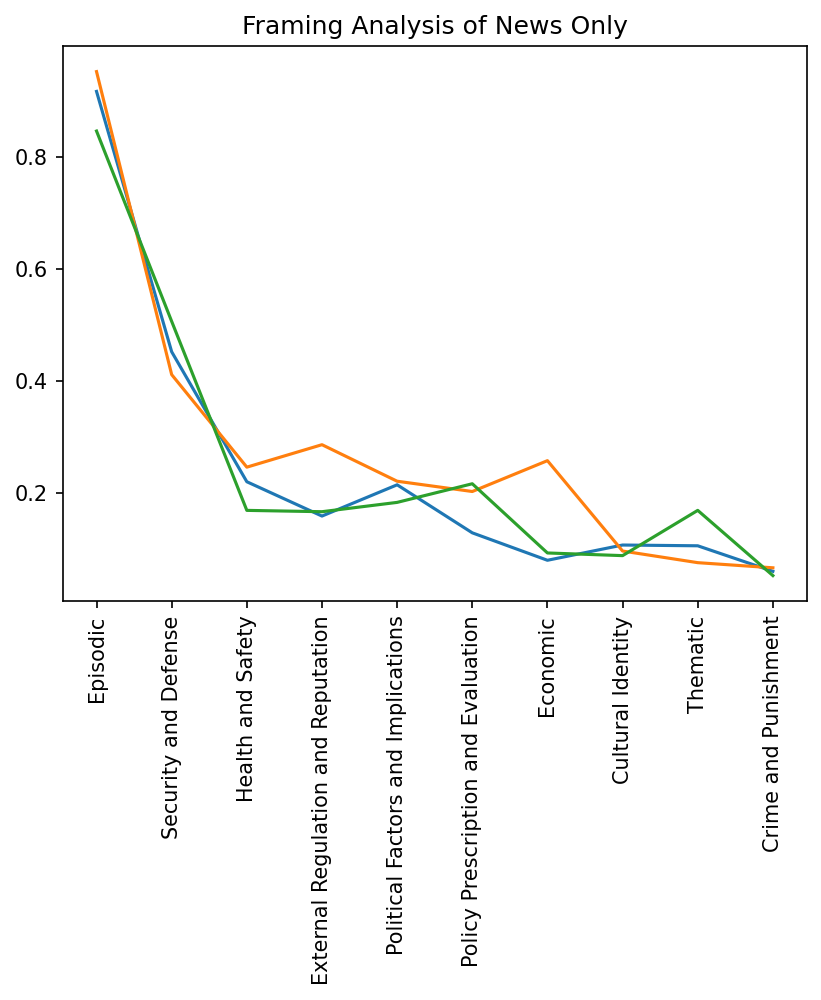

In [38]:
plt.gcf().set_dpi(150)

for index, row in df_top10.iterrows():
    plt.plot(row.values)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)
    label = index + ' - ins'
    
    plt.title("Framing Analysis of News Only")

### stacked_ins_df_gaza_3
Instagram Posts

In [21]:
stacked_ins_df = pd.read_csv('scraping/stacked_ins_df.csv')
# stacked_ins_df.head()
stacked_ins_df_gaza = stacked_ins_df[stacked_ins_df['is_about_gaza_1'] == True]
len(stacked_ins_df_gaza)

191

In [22]:
stacked_ins_df_gaza_3 = stacked_ins_df_gaza[(stacked_ins_df_gaza['owner_username'] == 'WSJ') | 
                                            (stacked_ins_df_gaza['owner_username'] == 'NYTimes') | 
                                            (stacked_ins_df_gaza['owner_username'] == 'Reuters')]
len(stacked_ins_df_gaza_3)

191

In [23]:
texts2 = []
owner_usernames2 = []

for index, row in stacked_ins_df_gaza_3.iterrows():
    texts2.append(row['caption'])
    owner_usernames2.append(row['owner_username'])

In [24]:
#Loops through all 3 frame types (Issue-Generic, Issue-Specific, Narrative)
#Produces list of Pandas dataframes (for each frame type) with binary indicator for if a frame is detected
dfs_2 = []
for frame_type in frames.keys():
    frame_labels = frames[frame_type]
    predictions, raw_outputs = models[frame_type].predict(texts2)  #This is where we do multilabel frame classification
    new_df_2 = pd.DataFrame(predictions)
    new_df_2.columns = frame_labels
    new_df_2['Text'] = texts2
    new_df_2 = new_df_2.set_index('Text')
    dfs_2.append(new_df_2)

  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [25]:
#This is the resulting dataframe for immigration-specific frames. 1 indicates that a frame was detected.
dfs_2[1]

,Hero: Cultural Diversity,Hero: Integration,Hero: Worker,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War
Text,,,,,,,,,,,
"Deadly Israeli Airstrike Hits Dense Area in Northern Gaza\n\nIsrael said it targeted Hamas militants on Tuesday in northern Gaza, and Hamas and hospital officials said the airstrikes killed and wounded many and leveled part of the Jabaliya neighborhood. The Gaza Health Ministry, which is controlled by Hamas, said the Israeli strikes had killed and wounded “hundreds,” a statement that could not be immediately verified. A doctor at a nearby hospital, Dr. Marwan Sultan, said the facility was receiving hundreds of injured people and that dozens were dead.\n\nTap the link in our bio to read the latest on the war.",0,0,0,0,0,0,0,0,0,0,0
"For weeks, Tasneem Ismael Ahel, a 19-year-old Palestinian college student trapped in Gaza City, has been documenting the effects of Israeli bombardment on her hometown for The New York Times, sharing her firsthand accounts of the war through voice recordings sent via WhatsApp.\n\nA video shared with The Times shows that the multi-story apartment that housed Tasneem, her parents, her five younger siblings and her extended family was destroyed, the roof and walls crumbled into thick concrete pieces scattered on top of each other.\n\nRead the latest updates from the war at the link in our bio.",0,0,0,0,0,0,0,0,0,0,0
"Antony Blinken, the U.S. secretary of state, and Lloyd Austin, the defense secretary, appeared on Capitol Hill on Tuesday morning for the first time since the start of the war in Gaza. Their testimony was interrupted by a series of protesters demanding a cease-fire, denouncing the U.S. for funding what they called a genocide of Gazans and accusing the administration officials of being terrorists.\n\nTap the link in our bio to read the latest updates on the war.",0,0,0,0,0,0,0,0,0,0,0
"Israeli Mother Is Brought to Tears at Abduction Site\n\nHadas Kalderon was brought to tears while surveying the damage from the Oct. 7 attack by Hamas. Israeli military officials brought Kalderon to the home of her mother, who was found dead near Kibbutz Nir Oz.\n\nLater, Kalderon visited her ex-husband’s home, where he and their two children were abducted. The children had been staying the night at his home when the attack occurred.\n\nTap the link in our bio to read updates on the war.",0,0,0,0,0,0,0,0,0,1,0
"War Through the Eyes of Gaza’s Children\n\n“I would start trembling,” 5-year-old Wael Salha said at a U.N. camp in southern Gaza. He was among several children in Gaza interviewed by The New York Times about the experiences of fleeing their homes following intense airstrikes by the Israeli army. According to the U.N., more than a million Gazans have been displaced since the beginning of the Israel-Hamas war, many of them children. The children The Times spoke to described the squalid conditions they were living in and the constant fear they experienced while trying to make sense of a war with no end in sight.\n\nTap the link in our bio for the latest updates on the war. Video by @elnaggarmona, @neilacollier , Danielle Miller and Mark Boyer/The New York Times",0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
"Palestinians gather at the site of an Israeli strike on a house in the Jabalia refugee camp in the northern Gaza Strip, November 4, 2023. \n\nPalestinian President Mahmoud Abbas demanded an immediate Israeli ceasefire at a meeting with top U.S. diplomat Antony Blinken as Gaza's health ministry said dozens died in a strike on a refugee camp overnight.\n\nBlinken, who dismissed the idea of a ceasefire by Israel for fear it would benefit Hamas, made an unannounced visit to the occupied West Bank as part of an effort to prevent the Israel-Hamas war from spreading. \n\n🔗 Read the latest news at our link in bio. 📷 Anas al-Shareef #Gaza #Israel #Jabalia #reuter

In [26]:
#Just aggregating all 3 frame types
df_2 = pd.concat(dfs_2,axis=1)
df_2.head()

,Capacity and Resources,Crime and Punishment,Cultural Identity,Economic,External Regulation and Reputation,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality and Ethics,Policy Prescription and Evaluation,...,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War,Episodic,Thematic
Text,,,,,,,,,,,,,,,,,,,,,
"Deadly Israeli Airstrike Hits Dense Area in Northern Gaza\n\nIsrael said it targeted Hamas militants on Tuesday in northern Gaza, and Hamas and hospital officials said the airstrikes killed and wounded many and leveled part of the Jabaliya neighborhood. The Gaza Health Ministry, which is controlled by Hamas, said the Israeli strikes had killed and wounded “hundreds,” a statement that could not be immediately verified. A doctor at a nearby hospital, Dr. Marwan Sultan, said the facility was receiving hundreds of injured people and that dozens were dead.\n\nTap the link in our bio to read the latest on the war.",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"For weeks, Tasneem Ismael Ahel, a 19-year-old Palestinian college student trapped in Gaza City, has been documenting the effects of Israeli bombardment on her hometown for The New York Times, sharing her firsthand accounts of the war through voice recordings sent via WhatsApp.\n\nA video shared with The Times shows that the multi-story apartment that housed Tasneem, her parents, her five younger siblings and her extended family was destroyed, the roof and walls crumbled into thick concrete pieces scattered on top of each other.\n\nRead the latest updates from the war at the link in our bio.",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"Antony Blinken, the U.S. secretary of state, and Lloyd Austin, the defense secretary, appeared on Capitol Hill on Tuesday morning for the first time since the start of the war in Gaza. Their testimony was interrupted by a series of protesters demanding a cease-fire, denouncing the U.S. for funding what they called a genocide of Gazans and accusing the administration officials of being terrorists.\n\nTap the link in our bio to read the latest updates on the war.",0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"Israeli Mother Is Brought to Tears at Abduction Site\n\nHadas Kalderon was brought to tears while surveying the damage from the Oct. 7 attack by Hamas. Israeli military officials brought Kalderon to the home of her mother, who was found dead near Kibbutz Nir Oz.\n\nLater, Kalderon visited her ex-husband’s home, where he and their two children were abducted. The children had been staying the night at his home when the attack occurred.\n\nTap the link in our bio to read updates on the war.",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
"War Through the Eyes of Gaza’s Children\n\n“I would start trembling,” 5-year-old Wael Salha said at a U.N. camp in southern Gaza. He was among several children in Gaza interviewed by The New York Times about the experiences of fleeing their homes following intense airstrikes by the Israeli army. According to the U.N., more than a million Gazans have been displaced since the beginning of the Israel-Hamas war, many of them children. The children The Times spoke to described the squalid conditions they were living in and the constant fear they experienced while trying to make sense of a war with no end in sight.\n\nTap the link in our bio for the latest updates on the war. Video by @elnaggarmona, @neilacollier , Danielle Miller and Mark Boyer/The New York Times",0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [27]:
df_2['owner_username'] = owner_usernames2
df_2.to_csv('df_framing_ins.csv', index=False)

In [28]:
# #Snippet to output detected frames as list instead of binary indicators
# cols = df_2.columns
# detected_frames = df_2.apply(lambda x: x > 0).apply(lambda x: list(cols[x.values]), axis=1)
# df_2['Detected Frames'] = detected_frames
# df_2 = df_2.reset_index()
# df_2[['Text','Detected Frames']]

In [29]:
# list(df_2['Detected Frames'])

In [30]:
# #And a snippet that's more easily readable
# for i in range(len(texts2)):
#     print('Text: ' + texts2[i])
#     print('Frames: ' + ', '.join(list(df_2['Detected Frames'])[i]))
#     print('*******')

In [31]:
df_2.groupby(by='owner_username').sum()

,Capacity and Resources,Crime and Punishment,Cultural Identity,Economic,External Regulation and Reputation,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality and Ethics,Policy Prescription and Evaluation,...,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War,Episodic,Thematic
owner_username,,,,,,,,,,,,,,,,,,,,,
NYTimes,1,22,25,5,14,4,74,3,10,13,...,0,0,0,7,2,0,30,4,98,12
Reuters,2,8,23,1,10,1,45,2,5,8,...,0,0,0,2,0,0,15,4,57,6
WSJ,0,9,2,2,4,1,20,0,0,4,...,0,0,0,4,1,0,3,1,36,5


In [32]:
df_2.sum().drop('owner_username').sort_values(ascending=False)

Episodic                                     191
Security and Defense                         157
Health and Safety                            139
Political Factors and Implications            65
Cultural Identity                             50
Victim: Humanitarian                          48
Crime and Punishment                          39
External Regulation and Reputation            28
Public Sentiment                              27
Policy Prescription and Evaluation            25
Thematic                                      23
Morality and Ethics                           15
Threat: Public Order                          13
Victim: War                                    9
Economic                                       8
Quality of Life                                7
Fairness and Equality                          6
Legality, Constitutionality, Jurisdiction      5
Victim: Discrimination                         3
Capacity and Resources                         3
Hero: Cultural Diver

In [33]:
top_index_2 = df_2.sum().drop('owner_username').sort_values(ascending=False).index[:10]

In [34]:
# to use the same indexes (column names) as the previous df

df_top10_2 = df_2.groupby(by='owner_username').mean()[top_index]
df_top10_2

,Episodic,Security and Defense,Health and Safety,External Regulation and Reputation,Political Factors and Implications,Policy Prescription and Evaluation,Economic,Cultural Identity,Thematic,Crime and Punishment
owner_username,,,,,,,,,,
NYTimes,1.0,0.744898,0.755102,0.142857,0.295918,0.132653,0.051020,0.255102,0.122449,0.224490
Reuters,1.0,0.964912,0.789474,0.175439,0.385965,0.140351,0.017544,0.403509,0.105263,0.140351
WSJ,1.0,0.805556,0.555556,0.111111,0.388889,0.111111,0.055556,0.055556,0.138889,0.250000


Text(0.5, 1.0, 'Framing Analysis of News and Instagram Post')

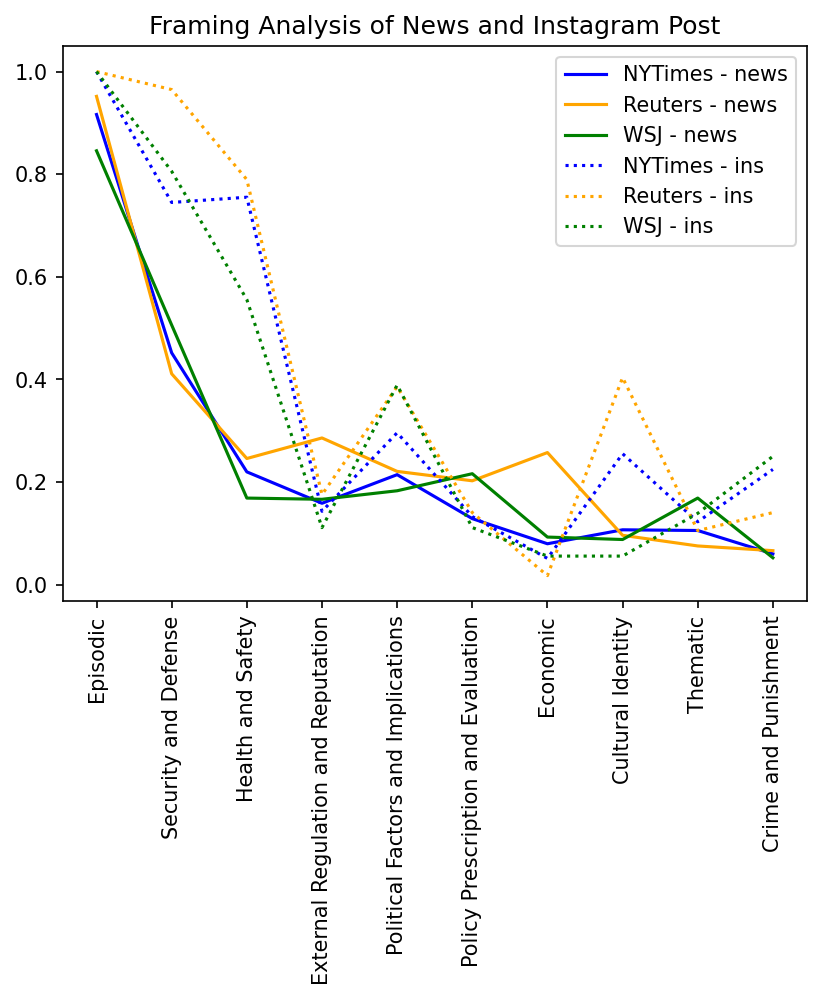

In [39]:

plt.gcf().set_dpi(150)

for index, row in df_top10.iterrows():
    if index == "NYTimes":
        color = 'blue'
    elif index == "WSJ":
        color = 'green'
    elif index == "Reuters":
        color = 'orange'
    label = index + ' - news'
    plt.plot(row.values, color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

for index, row in df_top10_2.iterrows():
    if index == "NYTimes":
        color = 'blue'
    elif index == "WSJ":
        color = 'green'
    elif index == "Reuters":
        color = 'orange'
    label = index + ' - ins'
    plt.plot(row.values, ':', color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

plt.legend()
plt.title("Framing Analysis of News and Instagram Post")

Text(0.5, 1.0, 'Framing Analysis of News and Instagram Post - NYTimes')

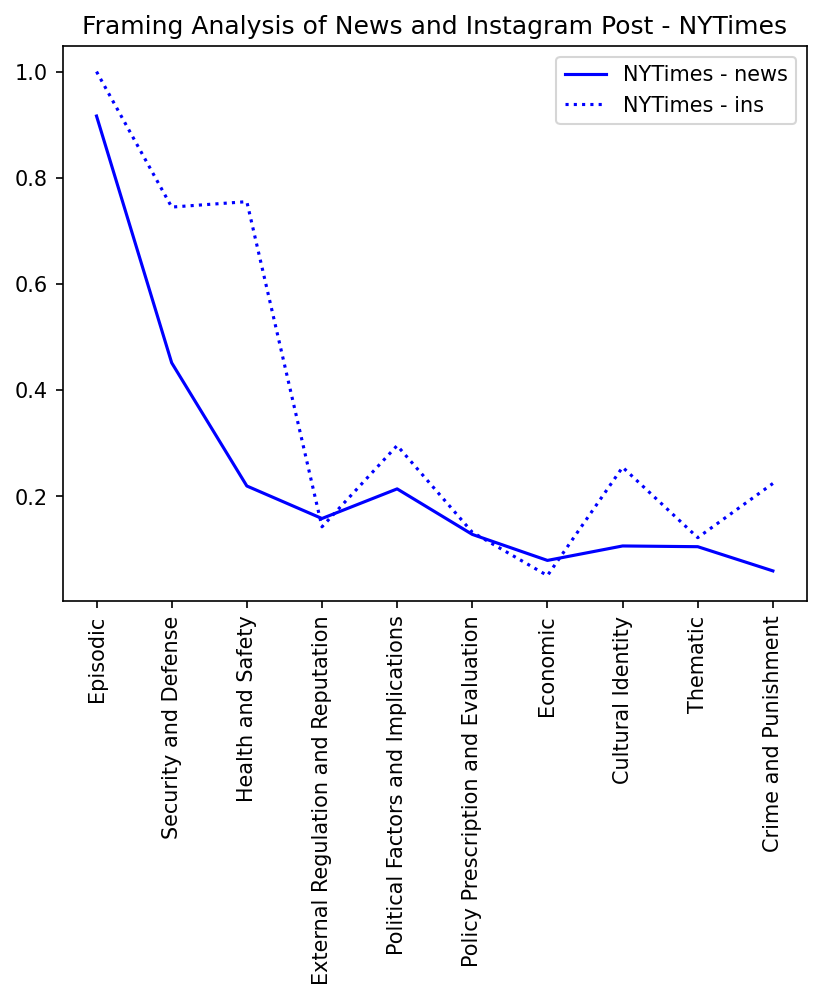

In [41]:
# NYTimes


plt.gcf().set_dpi(150)

for index, row in df_top10.iterrows():
    if index == "NYTimes":
        color = 'blue'
    elif index == "WSJ":
        continue
        color = 'green'
    elif index == "Reuters":
        continue
        color = 'orange'
    label = index + ' - news'
    plt.plot(row.values, color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

for index, row in df_top10_2.iterrows():
    if index == "NYTimes":
        color = 'blue'
    elif index == "WSJ":
        continue
        color = 'green'
    elif index == "Reuters":
        continue
        color = 'orange'
    label = index + ' - ins'
    plt.plot(row.values, ':', color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

plt.legend()
plt.title("Framing Analysis of News and Instagram Post - NYTimes")

Text(0.5, 1.0, 'Framing Analysis of News and Instagram Post - WSJ')

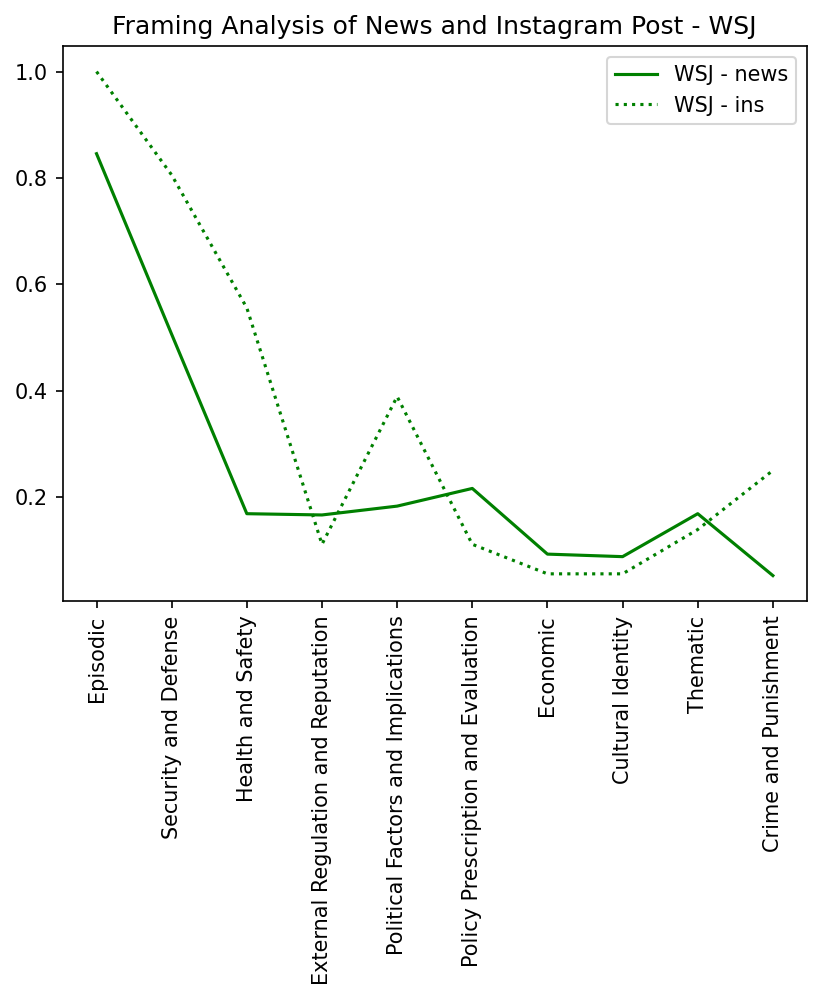

In [43]:
# WSJ


plt.gcf().set_dpi(150)

for index, row in df_top10.iterrows():
    if index == "NYTimes":
        continue
        color = 'blue'
    elif index == "WSJ":
        color = 'green'
    elif index == "Reuters":
        continue
        color = 'orange'
    label = index + ' - news'
    plt.plot(row.values, color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

for index, row in df_top10_2.iterrows():
    if index == "NYTimes":
        continue
        color = 'blue'
    elif index == "WSJ":
        color = 'green'
    elif index == "Reuters":
        continue
        color = 'orange'
    label = index + ' - ins'
    plt.plot(row.values, ':', color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

plt.legend()
plt.title("Framing Analysis of News and Instagram Post - WSJ")

Text(0.5, 1.0, 'Framing Analysis of News and Instagram Post - Reuters')

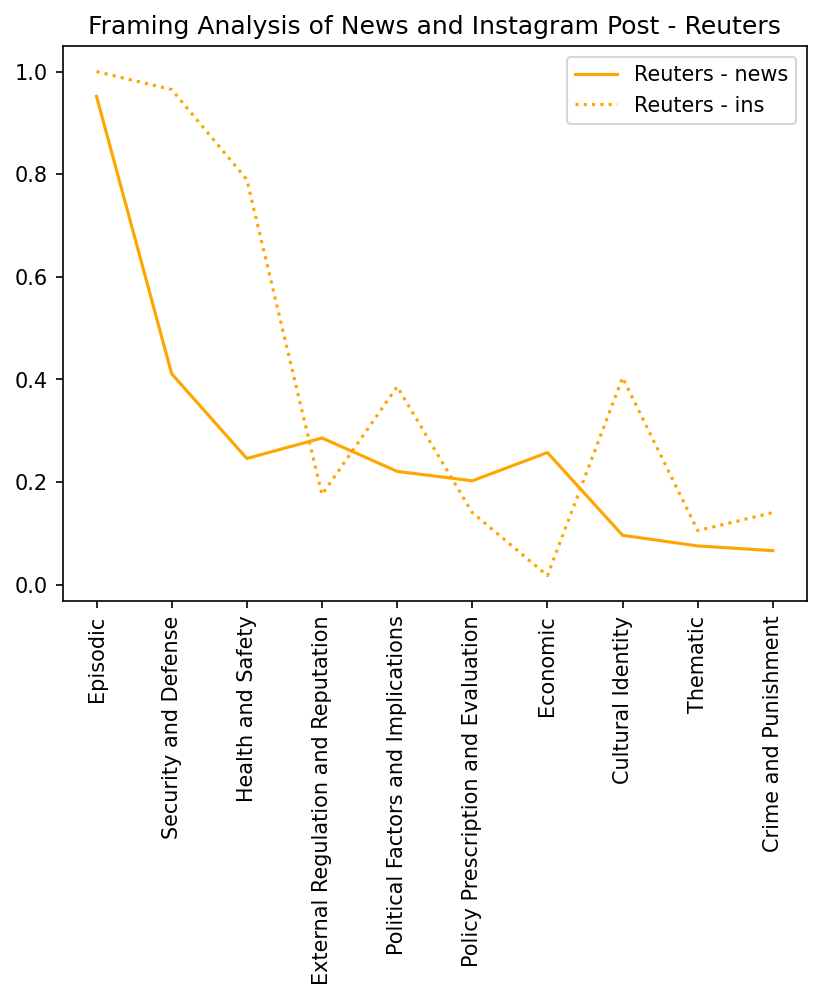

In [44]:
# Reuters


plt.gcf().set_dpi(150)

for index, row in df_top10.iterrows():
    if index == "NYTimes":
        continue
        color = 'blue'
    elif index == "WSJ":
        continue
        color = 'green'
    elif index == "Reuters":
        color = 'orange'
    label = index + ' - news'
    plt.plot(row.values, color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

for index, row in df_top10_2.iterrows():
    if index == "NYTimes":
        continue
        color = 'blue'
    elif index == "WSJ":
        continue
        color = 'green'
    elif index == "Reuters":
        color = 'orange'
    label = index + ' - ins'
    plt.plot(row.values, ':', color=color, label=label)
    plt.xticks(np.arange(0, 10, step=1))
    plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

plt.legend()
plt.title("Framing Analysis of News and Instagram Post - Reuters")

In [53]:
series_average_1 = df_top10.mean()[top_index]
series_average_1

Episodic                              0.904549
Security and Defense                  0.456184
Health and Safety                     0.211383
External Regulation and Reputation    0.203542
Political Factors and Implications    0.205950
Policy Prescription and Evaluation    0.182347
Economic                              0.143197
Cultural Identity                     0.096926
Thematic                              0.116471
Crime and Punishment                  0.059424
dtype: float64

In [52]:
series_average_2 = df_top10_2.mean()[top_index]
series_average_2

Episodic                              1.000000
Security and Defense                  0.838455
Health and Safety                     0.700044
External Regulation and Reputation    0.143136
Political Factors and Implications    0.356924
Policy Prescription and Evaluation    0.128038
Economic                              0.041373
Cultural Identity                     0.238055
Thematic                              0.122200
Crime and Punishment                  0.204947
dtype: float64

In [54]:
series_average_1.index

Index(['Episodic', 'Security and Defense', 'Health and Safety',
       'External Regulation and Reputation',
       'Political Factors and Implications',
       'Policy Prescription and Evaluation', 'Economic', 'Cultural Identity',
       'Thematic', 'Crime and Punishment'],
      dtype='object')

In [55]:
series_average_1.values

array([0.90454879, 0.45618384, 0.21138299, 0.20354214, 0.20594997,
       0.18234706, 0.14319734, 0.09692585, 0.1164714 , 0.05942403])

Text(0.5, 1.0, 'Framing Analysis of News and Instagram Post - Average of Three Media')

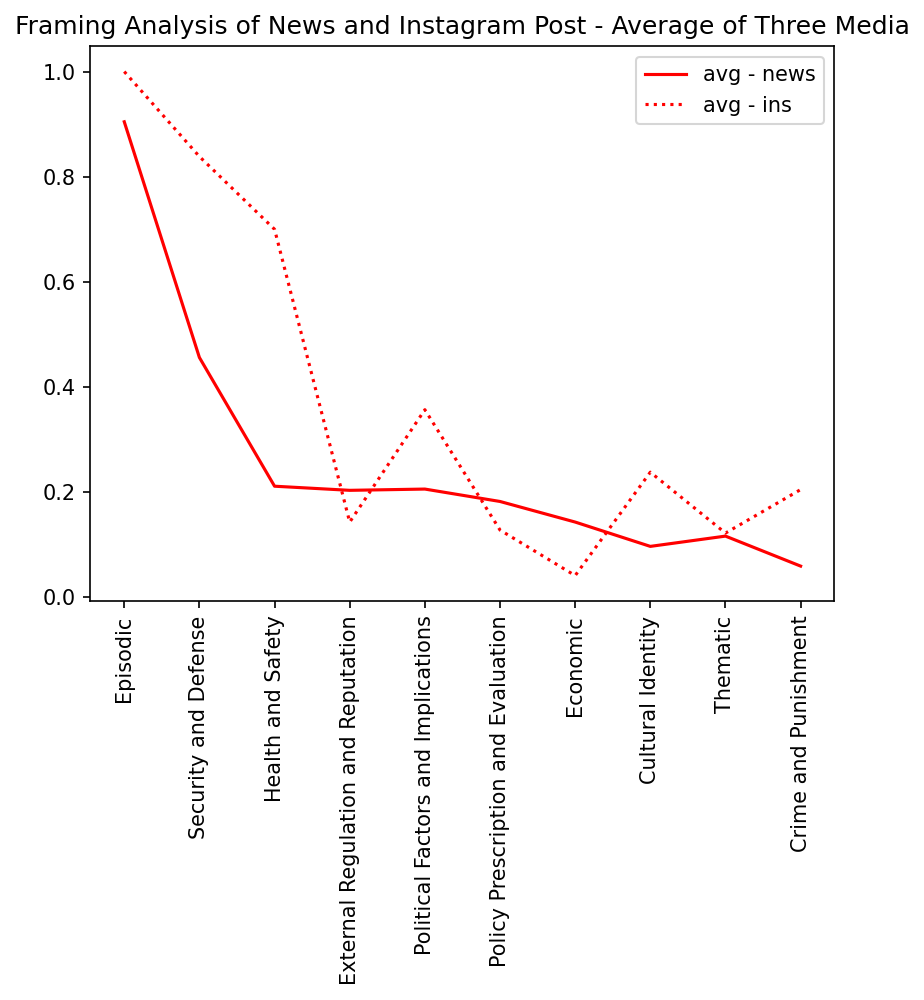

In [57]:
plt.gcf().set_dpi(150)

label = 'avg' + ' - news'
plt.plot(series_average_1.values, color='red', label=label)
plt.xticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)


label = 'avg' + ' - ins'
plt.plot(series_average_2.values, ':', color='red', label=label)
plt.xticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(0, 10, step=1), top_index, rotation=90)

plt.legend()
plt.title("Framing Analysis of News and Instagram Post - Average of Three Media")